In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
data= pd.read_csv("Prediction.csv")
data

,Month_with_date,Counting_from_april,Confirmed_Cases,Recovered_Cases,Deceased_Cases
0,April-1-2020,1,2059,169,53
1,April-2-2020,2,2545,191,69
2,April-3-2020,3,3105,230,83
3,April-4-2020,4,3684,286,96
4,April-5-2020,5,4293,329,118
5,April-6-2020,6,4777,394,134
6,April-7-2020,7,5350,469,161
7,April-8-2020,8,5915,565,181
8,April-9-2020,9,6728,635,227
9,April-10-2020,10,7599,786,249


In [3]:
real_x= data.iloc[:,1].values
real_y= data.iloc[:,3].values
real_x= real_x.reshape(-1,1)
real_y= real_y.reshape(-1,1)

In [4]:
training_x,testing_x,training_y,testing_y = train_test_split(real_x,real_y,test_size=0.2,random_state=0) 

In [5]:
Lin= LinearRegression()
Lin.fit(training_x,training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
pred_y= Lin.predict(testing_x)

In [7]:
testing_x

array([[46],
       [34],
       [41],
       [27],
       [12],
       [ 3],
       [33],
       [44],
       [47],
       [31],
       [ 5],
       [11]], dtype=int64)

In [8]:
testing_y

array([[34257],
       [12845],
       [22549],
       [ 7103],
       [ 1086],
       [  230],
       [11763],
       [28011],
       [36795],
       [10021],
       [  329],
       [  972]], dtype=int64)

In [9]:
pred_y

array([[ 35614.49138018],
       [ 22548.11940021],
       [ 30170.16972186],
       [ 14926.06907857],
       [ -1406.89589639],
       [-11206.67488137],
       [ 21459.25506855],
       [ 33436.76271685],
       [ 36703.35571184],
       [ 19281.52640522],
       [ -9028.94621804],
       [ -2495.76022806]])

In [10]:
Lin.coef_

array([[1088.86433166]])

In [11]:
Lin.intercept_

array([-14473.26787636])

In [12]:
-14473.26787636+46*1088.86433166

35614.49138000001

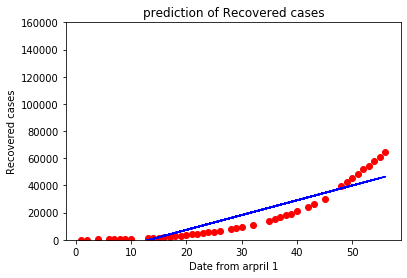

In [13]:
plt.scatter(training_x,training_y,color="red")
plt.plot(training_x,Lin.predict(training_x),color="blue")
axes = plt.gca()
axes.set_ylim([0,160000])
plt.title("prediction of Recovered cases")
plt.xlabel("Date from arpril 1")
plt.ylabel("Recovered cases")
plt.show()

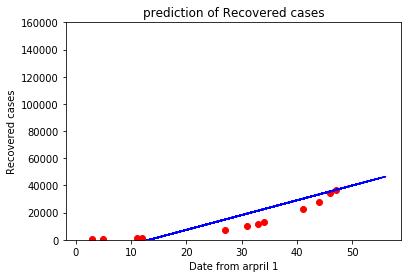

In [14]:
plt.scatter(testing_x,testing_y,color="red")
plt.plot(training_x,Lin.predict(training_x),color="blue")
axes = plt.gca()
axes.set_ylim([0,160000])
plt.title("prediction of Recovered cases")
plt.xlabel("Date from arpril 1")
plt.ylabel("Recovered cases")
plt.show()

In [15]:
r2_score(testing_y,pred_y)*100 #Check Accuracy

66.64032778260112